In [1]:
import pandas as pd
file_path = './ref/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보2025.csv'
df = pd.read_csv(file_path, encoding='EUC-KR')
df.head(10) #데이터 5개 가져오기(데이터 잘 가져오나 확인하는 용도)
# df.tail()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,합계
0,202501,1호선,동대문,574,24,9298,1703,7860,5151,11813,...,701,2571,12,217,0,0,0,0,20250203,669467
1,202501,1호선,동묘앞,140,5,2218,815,3245,4101,7160,...,133,1749,2,214,0,0,0,0,20250203,564871
2,202501,1호선,서울역,560,51,8353,7685,20145,46128,61204,...,4266,6765,239,237,0,0,0,0,20250203,3641701
3,202501,1호선,시청,89,0,1633,4268,3078,20969,6047,...,429,811,9,24,0,0,0,0,20250203,1403574
4,202501,1호선,신설동,362,10,7742,1924,8178,6905,17444,...,360,2314,3,46,0,0,0,0,20250203,728346
5,202501,1호선,제기동,305,1,4599,2124,7544,8403,18179,...,189,1381,8,49,0,0,0,0,20250203,990307
6,202501,1호선,종각,138,3,4176,4949,3897,28257,5592,...,1714,1049,12,16,0,0,0,0,20250203,2013383
7,202501,1호선,종로3가,140,9,3338,2424,3227,9593,4432,...,1378,1692,14,38,0,0,0,0,20250203,1332906
8,202501,1호선,종로5가,33,1,1504,2880,2611,12776,4801,...,255,809,0,21,0,0,0,0,20250203,1227960
9,202501,1호선,청량리(서울시립대입구),830,15,8829,2757,14761,8484,39975,...,308,3378,5,64,0,0,0,0,20250203,1272687


In [2]:
columns1 = ['mon', 'line', 'station']
time_col0 = [f'{i}-{i+1}h'for i in range(4,24)]
time_col1 = [f'{i}-{i+1}h'for i in range(4,24)]
time_col2 = [f'{y}-{y+1}h'for y in range(0,4)]
time_col3 = [f'{y}-{y+1}h'for y in range(0,4)]
columns = columns1 + time_col0 + time_col1+ time_col2+ time_col3 +['make']+['total']
df.columns = columns
# print(len(df.columns)) 53 
# print(len(columns))    53 
# df = df.iloc[:,:5]
df_selected = df.iloc[:, [0, 1, 2, -1]]
df_selected

,mon,line,station,total
0,202501,1호선,동대문,669467
1,202501,1호선,동묘앞,564871
2,202501,1호선,서울역,3641701
3,202501,1호선,시청,1403574
4,202501,1호선,신설동,728346
...,...,...,...,...
616,202501,중앙선,원덕,17402
617,202501,중앙선,중랑,287249
618,202501,중앙선,지평,2695
619,202501,중앙선,팔당,41050


In [3]:
df_selected.head()

,mon,line,station,total
0,202501,1호선,동대문,669467
1,202501,1호선,동묘앞,564871
2,202501,1호선,서울역,3641701
3,202501,1호선,시청,1403574
4,202501,1호선,신설동,728346


In [4]:
data = df_selected.groupby(['mon', 'line', 'station']).sum().reset_index()
data

,mon,line,station,total
0,202501,1호선,동대문,669467
1,202501,1호선,동묘앞,564871
2,202501,1호선,서울역,3641701
3,202501,1호선,시청,1403574
4,202501,1호선,신설동,728346
...,...,...,...,...
616,202501,중앙선,원덕,17402
617,202501,중앙선,중랑,287249
618,202501,중앙선,지평,2695
619,202501,중앙선,팔당,41050


In [5]:
gdata= data[['mon', 'line', 'station','total']]
gdata= gdata.sort_values(by=['station','mon'], ascending=[True,True])
gdata.tail(10)

,mon,line,station,total
175,202501,5호선,화곡,1443310
213,202501,6호선,화랑대(서울여대입구),513521
364,202501,경부선,화서,662799
592,202501,일산선,화정,932617
620,202501,중앙선,회기,1241543
397,202501,경원선,회룡,671480
119,202501,4호선,회현(남대문시장),1402862
214,202501,6호선,효창공원앞,363492
427,202501,경의선,효창공원앞,170172
300,202501,9호선,흑석(중앙대입구),461911


In [6]:
mdata = gdata.groupby(by='station').sum().reset_index()
tdata = mdata[['mon','line','station','total']]
tdata.tail(30)

,mon,line,station,total
498,202501,5호선,하남검단산,361084
499,202501,5호선,하남시청(덕풍?신장),447665
500,202501,5호선,하남풍산,245643
501,202501,7호선,학동,1156537
502,202501,3호선,학여울,116871
503,202501,6호선,한강진,950223
504,202501,경의선,한국항공대,80818
505,202501,경원선,한남,224375
506,202501,안산선,한대앞,469433
507,202501,4호선,한성대입구(삼선교),688865


In [7]:
sdata=tdata.sort_values(by='total', ascending=False)
sdata.head(10)
total_data = sdata[:30]
total_data

,mon,line,station,total
250,1012505,1호선4호선경부선경의선공항철도 1호선,서울역,5892963
427,405002,2호선8호선,잠실(송파구청),5350554
516,607503,2호선경의선공항철도 1호선,홍대입구,5245266
35,607503,3호선7호선9호선,고속터미널,4729132
11,202501,2호선,강남,4264556
217,405002,2호선4호선,사당,3647446
260,405002,2호선분당선,선릉,3396103
308,405002,2호선신림선,신림,3083821
3,405002,7호선경부선,가산디지털단지,2999142
355,405002,5호선9호선,여의도,2958977


In [8]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = './ref/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
plt.rcParams['font.family'] = 'D2Coding'

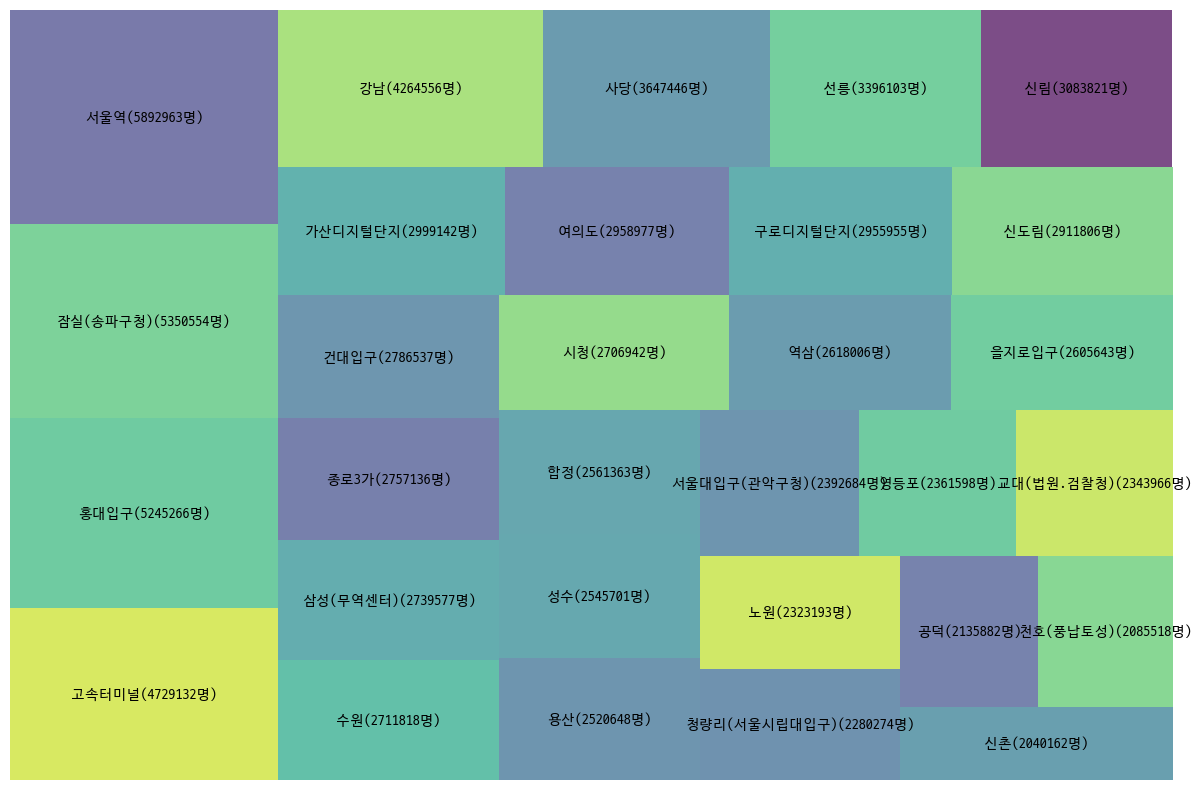

In [9]:
import squarify
plt.figure(figsize=(15,10))
# squarify.plot(sizes=sdata['total'].iloc[:20],label=sdata['name'].iloc[:20])
# squarify.plot(sizes=total_data['total'],label=total_data['name'], alpha=0.5)
squarify.plot(sizes=total_data['total'], label= [f"{x[0]}({x[1]}명)" for x in zip(total_data['station'],total_data['total'])], alpha= 0.7)
plt.rcParams['font.size'] = 8
# plt.rcParams['text.color'] = 'black'
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()